<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <h2 style="color:#7289da;">Project Summary</h2>
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
    This project explores user behaviours and acts as a classifier.
  </p>
</div>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
    Load the dataset
  </p>
</div>


In [2]:
dataset=pd.read_csv('./data/user_behavior_dataset.csv')

In [3]:
dataset.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [4]:
dataset.shape

(700, 11)

In [5]:
PREDICTED_COLUMN='User Behavior Class'

In [6]:
dataset=dataset.drop('User ID',axis=1)

In [7]:
dataset.head()

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Handling null values
  </p>
</div>


In [8]:
dataset.isnull().sum()

Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
Age                           0
Gender                        0
User Behavior Class           0
dtype: int64

<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
    No null values to handle.Great!!
  </p>
</div>


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Beginning EDA
  </p>
</div>


In [9]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
continous_numerical_feature=[feature for feature in numerical_features if len(dataset[feature].unique())>25]
discrete_numerical_feature=[feature for feature in numerical_features if feature not in continous_numerical_feature]

<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Handling categrorical features
  </p>
</div>


In [10]:
for feature in categorical_features:
    print(f'{feature} has {len(dataset[feature].unique())} unique values')

Device Model has 5 unique values
Operating System has 2 unique values
Gender has 2 unique values


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Reasonable number of categorical features
  </p>
</div>


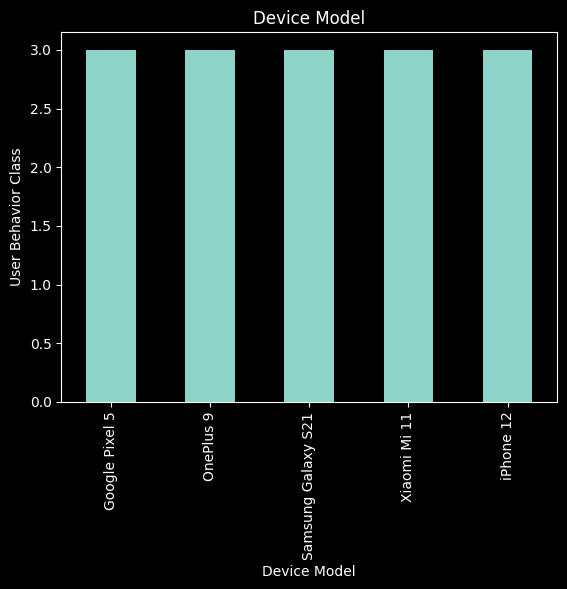

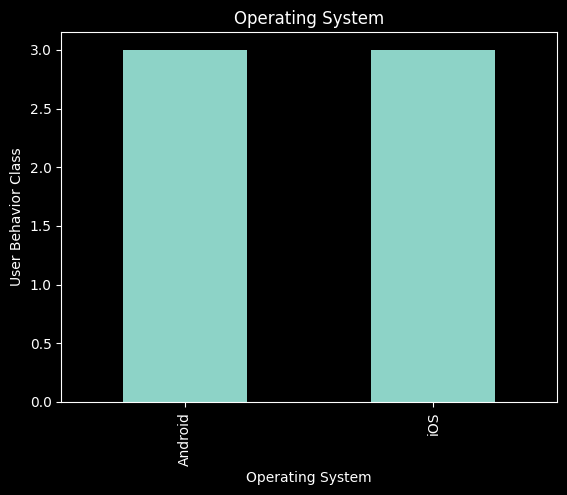

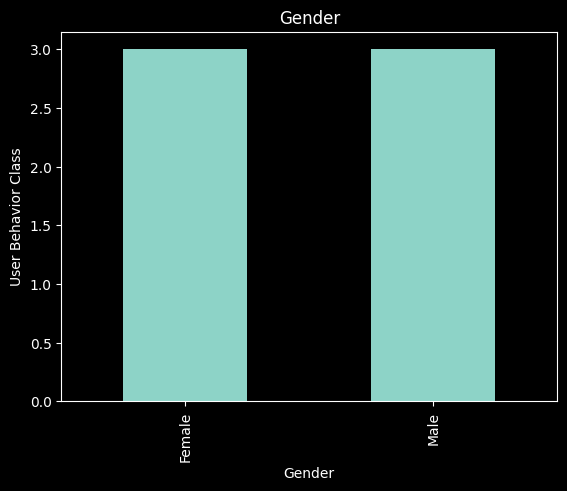

In [11]:
for feature in categorical_features:
    dataset.groupby(feature)[PREDICTED_COLUMN].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(PREDICTED_COLUMN)
    plt.show()


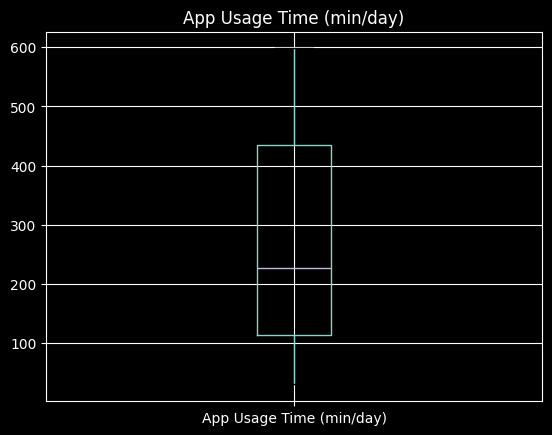

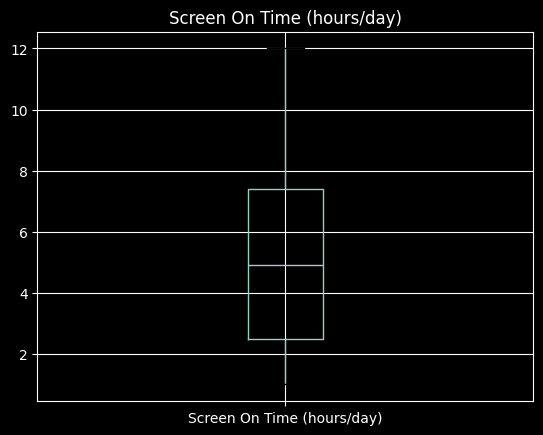

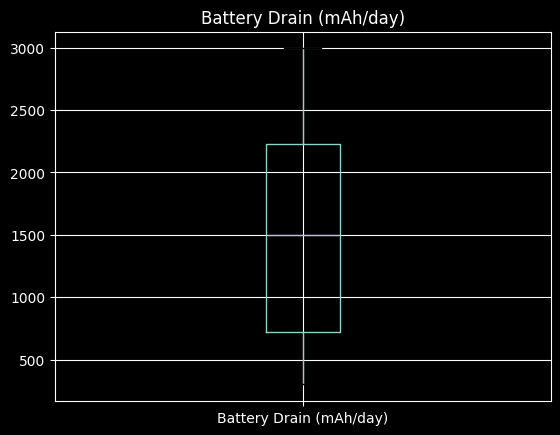

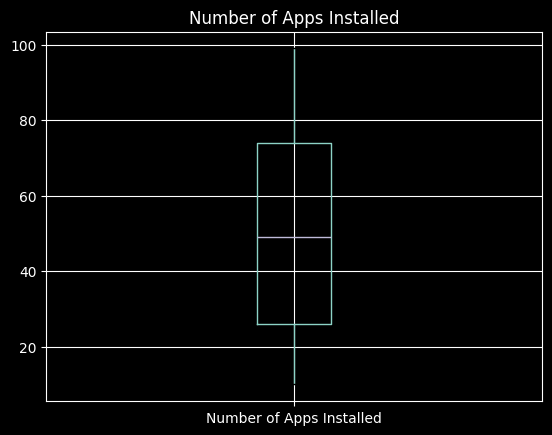

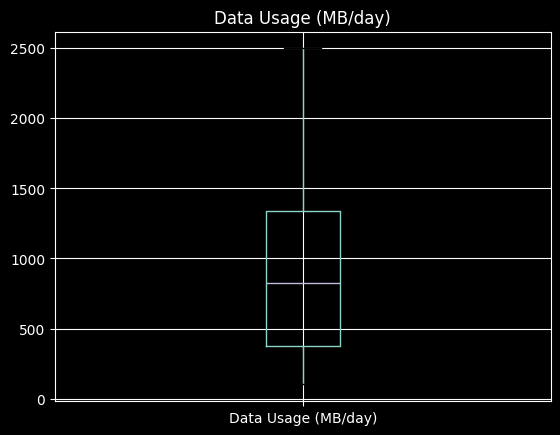

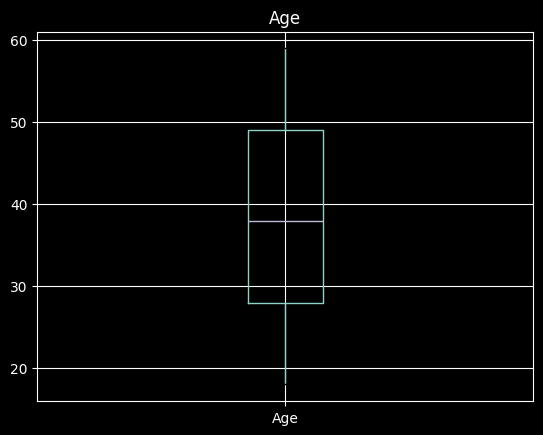

In [12]:
for feature in continous_numerical_feature:
    dataset.boxplot(column=feature)
    plt.title(feature)
    plt.show()

<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   No outliers
  </p>
</div>


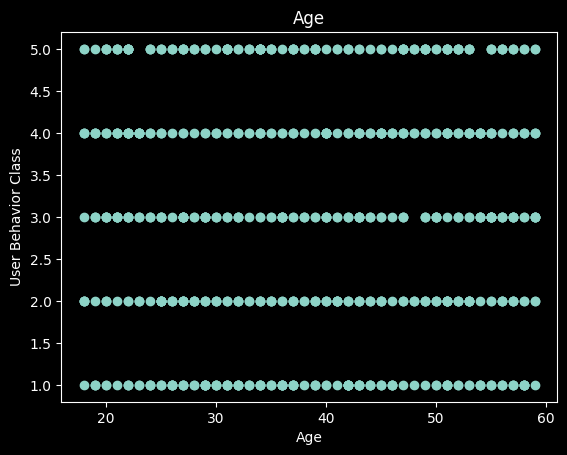

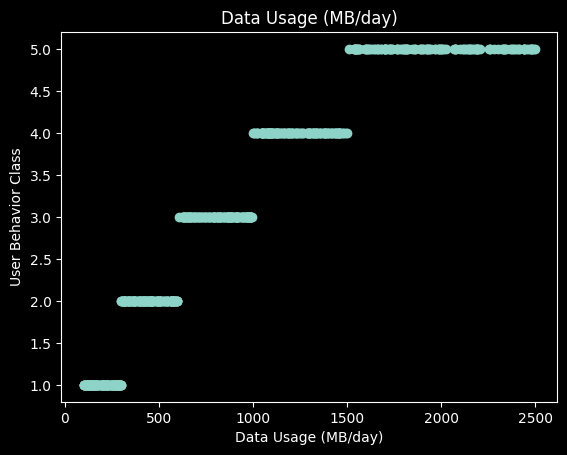

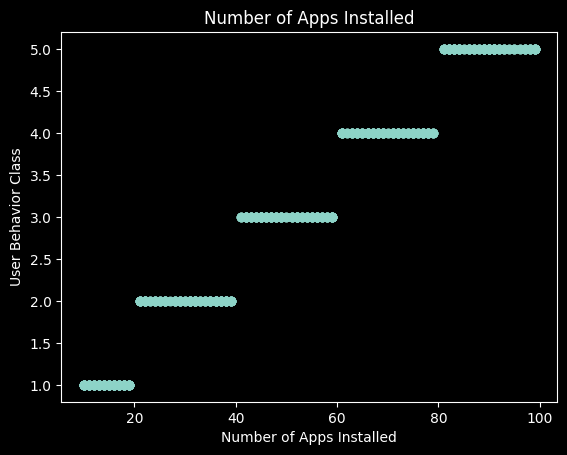

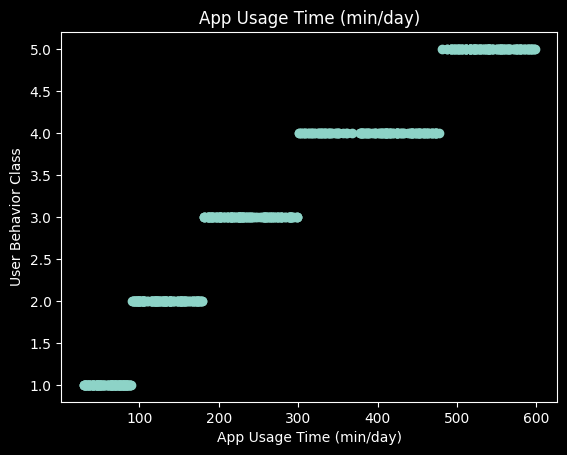

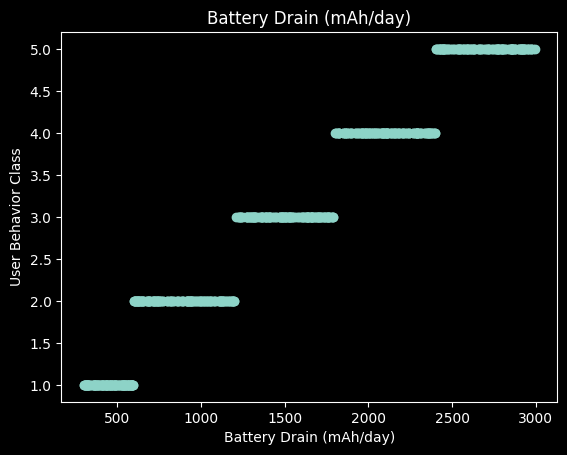

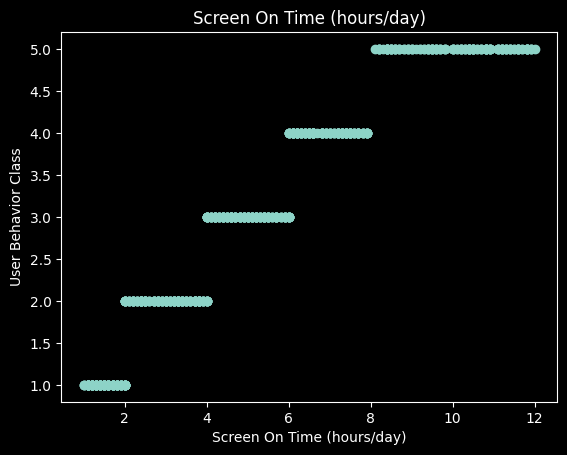

In [13]:
for feature in set(numerical_features)-{PREDICTED_COLUMN}:
    plt.scatter(dataset[feature],dataset[PREDICTED_COLUMN])
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel(PREDICTED_COLUMN)
    plt.show()

<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   I have no idea what to do
  </p>
</div>


In [14]:
for feature in discrete_numerical_feature:
    print(f'{feature} has {len(dataset[feature].unique())} unique values') 

User Behavior Class has 5 unique values


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   I was thinking of applying one hot encoding to all the categorical features
   <br/>
   Discrete Numerical feature is as good as non existent
  </p>
</div>


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Training and model selection
  </p>
</div>


In [15]:
from sklearn.model_selection import train_test_split

X=dataset.drop(columns=PREDICTED_COLUMN,axis=1)
Y=dataset[PREDICTED_COLUMN]
X_train, X_test, y_train, y_test =train_test_split(X,Y,random_state=42,test_size=0.33)

In [16]:
X

,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender
0,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male
1,OnePlus 9,Android,268,4.7,1331,42,944,47,Female
2,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male
3,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male
4,iPhone 12,iOS,187,4.3,1367,58,988,31,Female
...,...,...,...,...,...,...,...,...,...
695,iPhone 12,iOS,92,3.9,1082,26,381,22,Male
696,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male
697,Google Pixel 5,Android,99,3.1,942,22,457,50,Female
698,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male


In [17]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer([
    ('encoder',OneHotEncoder(),categorical_features),
    ('scaler',MinMaxScaler(),continous_numerical_feature)
])

In [18]:
from sklearn.tree import ExtraTreeClassifier,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.linear_model import RidgeClassifier,RidgeClassifierCV,SGDOneClassSVM,PassiveAggressiveClassifier,LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

models=[ExtraTreeClassifier(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(),
        RadiusNeighborsClassifier(),
        RidgeClassifier(),
        RidgeClassifierCV(),
        SGDOneClassSVM(),
        PassiveAggressiveClassifier(),
        LogisticRegression()
       ]

for model in models:
    pipeline=Pipeline([('preprocessor',preprocessor),('model',model)])
    pipeline.fit(X_train,y_train)
    predictions=pipeline.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)*100
    precision = precision_score(y_test, predictions, average='weighted')*100
    recall = recall_score(y_test, predictions, average='weighted')*100
    f1 = f1_score(y_test, predictions, average='weighted')*100
    cm = confusion_matrix(y_test, predictions)*100
    print(model.__class__.__name__)
    print('------------------------------------')
    print(f"Accuracy: {accuracy:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%\n")
    print("========================")

ExtraTreeClassifier
------------------------------------
Accuracy: 93.94%
Precision: 94.35%
Recall: 93.94%
F1 Score: 93.98%

DecisionTreeClassifier
------------------------------------
Accuracy: 99.13%
Precision: 99.16%
Recall: 99.13%
F1 Score: 99.13%

KNeighborsClassifier
------------------------------------
Accuracy: 93.07%
Precision: 94.99%
Recall: 93.07%
F1 Score: 93.41%

RadiusNeighborsClassifier
------------------------------------
Accuracy: 34.20%
Precision: 38.70%
Recall: 34.20%
F1 Score: 34.49%

RidgeClassifier
------------------------------------
Accuracy: 66.67%
Precision: 69.25%
Recall: 66.67%
F1 Score: 66.04%

RidgeClassifierCV
------------------------------------
Accuracy: 65.37%
Precision: 65.91%
Recall: 65.37%
F1 Score: 64.84%

SGDOneClassSVM
------------------------------------
Accuracy: 0.00%
Precision: 0.00%
Recall: 0.00%
F1 Score: 0.00%

PassiveAggressiveClassifier
------------------------------------
Accuracy: 65.80%
Precision: 70.17%
Recall: 65.80%
F1 Score: 66.86

d:\users\user\web\social-user-classifier\social-user-classifier\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\users\user\web\social-user-classifier\social-user-classifier\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   It appears Decision tree is best but check for overfitting.
   <br>
   Otherwise ExtraTreeClassifier is also good
  </p>
</div>


In [19]:
from sklearn.model_selection import cross_val_score

pipeline=Pipeline([('preprocessor',preprocessor),('model',DecisionTreeClassifier())])
scores = cross_val_score(pipeline, X, Y, cv=5, scoring='accuracy')
print(f'Accuracy: {scores.mean():.2f} ± {scores.std():.2f}')

Accuracy: 1.00 ± 0.01


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Its seems the model Decision Tree is good
  </p>
</div>


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
   Lets do hyperparameter tuning
  </p>
</div>


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # Split criteria
    'classifier__max_depth': [None, 5, 10, 15, 20],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Create the Decision Tree Classifier
model = DecisionTreeClassifier()

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',  # Use accuracy as the evaluation metric
                           cv=5,  # 5-fold cross-validation
                           verbose=1,  # Verbosity level
                           n_jobs=-1)  # Use all available cores

# Fit the Grid Search to the data
grid_search.fit(X, Y)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}
Best Score: 1.0


<div style="background-color:#2b2b2b; border-left: 5px solid #909497; padding: 10px 20px; margin: 20px 0; border-radius: 4px;">
  <p style="font-size: 16px; line-height: 1.5; color: #e0e0e0;">
  Ideal parameters:
  <br>
   {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 5}
  </p>
</div>


In [22]:
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
import joblib

preprocessor=ColumnTransformer([
    ('encoder',OneHotEncoder(),categorical_features),
    ('scaler',MinMaxScaler(),continous_numerical_feature)
])
model = DecisionTreeClassifier(max_depth=5,criterion='gini',min_samples_leaf=4,min_samples_split=5)
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])
pipeline.fit(X,Y)

joblib.dump(model, 'model.pkl')

['model.pkl']